In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import defaultdict

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re
import string
import operator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 5000000)
pd.set_option('display.max_columns', 5000000)
pd.set_option('display.width', 10000000)
pd.set_option('display.max_colwidth', 4000)

Using TensorFlow backend.


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")


df=pd.concat([train,test])
target = train[["label"]]
df.drop(["id"],axis=1,inplace=True)

D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
# @ ile başlayan kelimelerin hepsini dopladık

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [90]:
# Kısaltma Düzelme
""""
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"won\'t", "will not", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"can\'t", "can not", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"don\'t", "do not", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"dont", "do not", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"n\’t", " not", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"n\'t", " not", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"\'re", " are", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"\'s", " is", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"\’d", " would", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"\'ll", " will", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"\'t", " not", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"\'ve", " have", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"\'m", " am", str(x)))
""""

In [91]:
""""
def clean(tweet):
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
    return tweet    

df['tweet'] = df['tweet'].apply(lambda s : clean(s))    
"""

In [5]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [6]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [7]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    
    return url.sub(r'',text)

In [8]:
df['tweet']=df['tweet'].apply(lambda x: remove_emoji(x))

In [9]:
df['tweet']=df['tweet'].apply(lambda x : remove_punct(x))

In [10]:
df['tweet']=df['tweet'].apply(lambda x : remove_URL(x))

In [11]:
df["tweet"]=df["tweet"].str.replace("[^A-Za-z]"," ")

In [12]:
#Tek Harfliler droplanması

df["tweet"] = df["tweet"].str.replace(r"\b[a-zA-Z]\b", "")

In [13]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [14]:
from textblob import Word
#nltk.download('wordnet')
df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [15]:
sil = pd.Series(' '.join(df['tweet']).split()).value_counts()[-30000:]
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [68]:
# Manuel Kelimeler   
"""
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"amp", "", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"hu", "", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"feminismmuktbharat", "feminis", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"feminismiscancer", "feminis", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"feminismisterrorism", "feminis", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihday", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihdaygirl", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihdays", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihdaysway", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihdaygs", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihdaytome", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihdayboy", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihdaypresent", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihdaykazuki", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihdayjodistamaria", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"itsmybihday", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"thbihday", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"bihdaycake", "birthday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"trsdaythoughts", "trsday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"throwbacktrsday", "trsday", str(x)))
df['tweet'] = df['tweet'].map(lambda x: re.sub(r"thankfultrsday", "trsday", str(x)))

"""

In [18]:
#glove_embeddings = np.load('C:\\Users\\MONSTER\Documents\\PY\\NLP\Anality-Data-Twitter-Sentiment\\glove.840B.300d.pkl', allow_pickle=True)


def build_vocab(X):
    
    tweets = X.apply(lambda s: s.split()).values      
    vocab = {}
    
    for tweet in tweets:
        for word in tweet:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1                
    return vocab


def check_embeddings_coverage(X, embeddings):
    
    vocab = build_vocab(X)    
    
    covered = {}
    oov = {}    
    n_covered = 0
    n_oov = 0
    
    for word in vocab:
        try:
            covered[word] = embeddings[word]
            n_covered += vocab[word]
        except:
            oov[word] = vocab[word]
            n_oov += vocab[word]
            
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = (n_covered / (n_covered + n_oov))
    
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    return sorted_oov, vocab_coverage, text_coverage



train_glove_oov, train_glove_vocab_coverage, train_glove_text_coverage = check_embeddings_coverage(df['tweet'], glove_embeddings)

print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_glove_vocab_coverage, train_glove_text_coverage))

NameError: name 'glove_embeddings' is not defined

In [16]:
DISASTER_TWEETS = train['label'] == 1

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in sw]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in df[DISASTER_TWEETS]['tweet']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in df[~DISASTER_TWEETS]['tweet']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df[DISASTER_TWEETS]['tweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in df[~DISASTER_TWEETS]['tweet']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df[DISASTER_TWEETS]['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in df[~DISASTER_TWEETS]['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


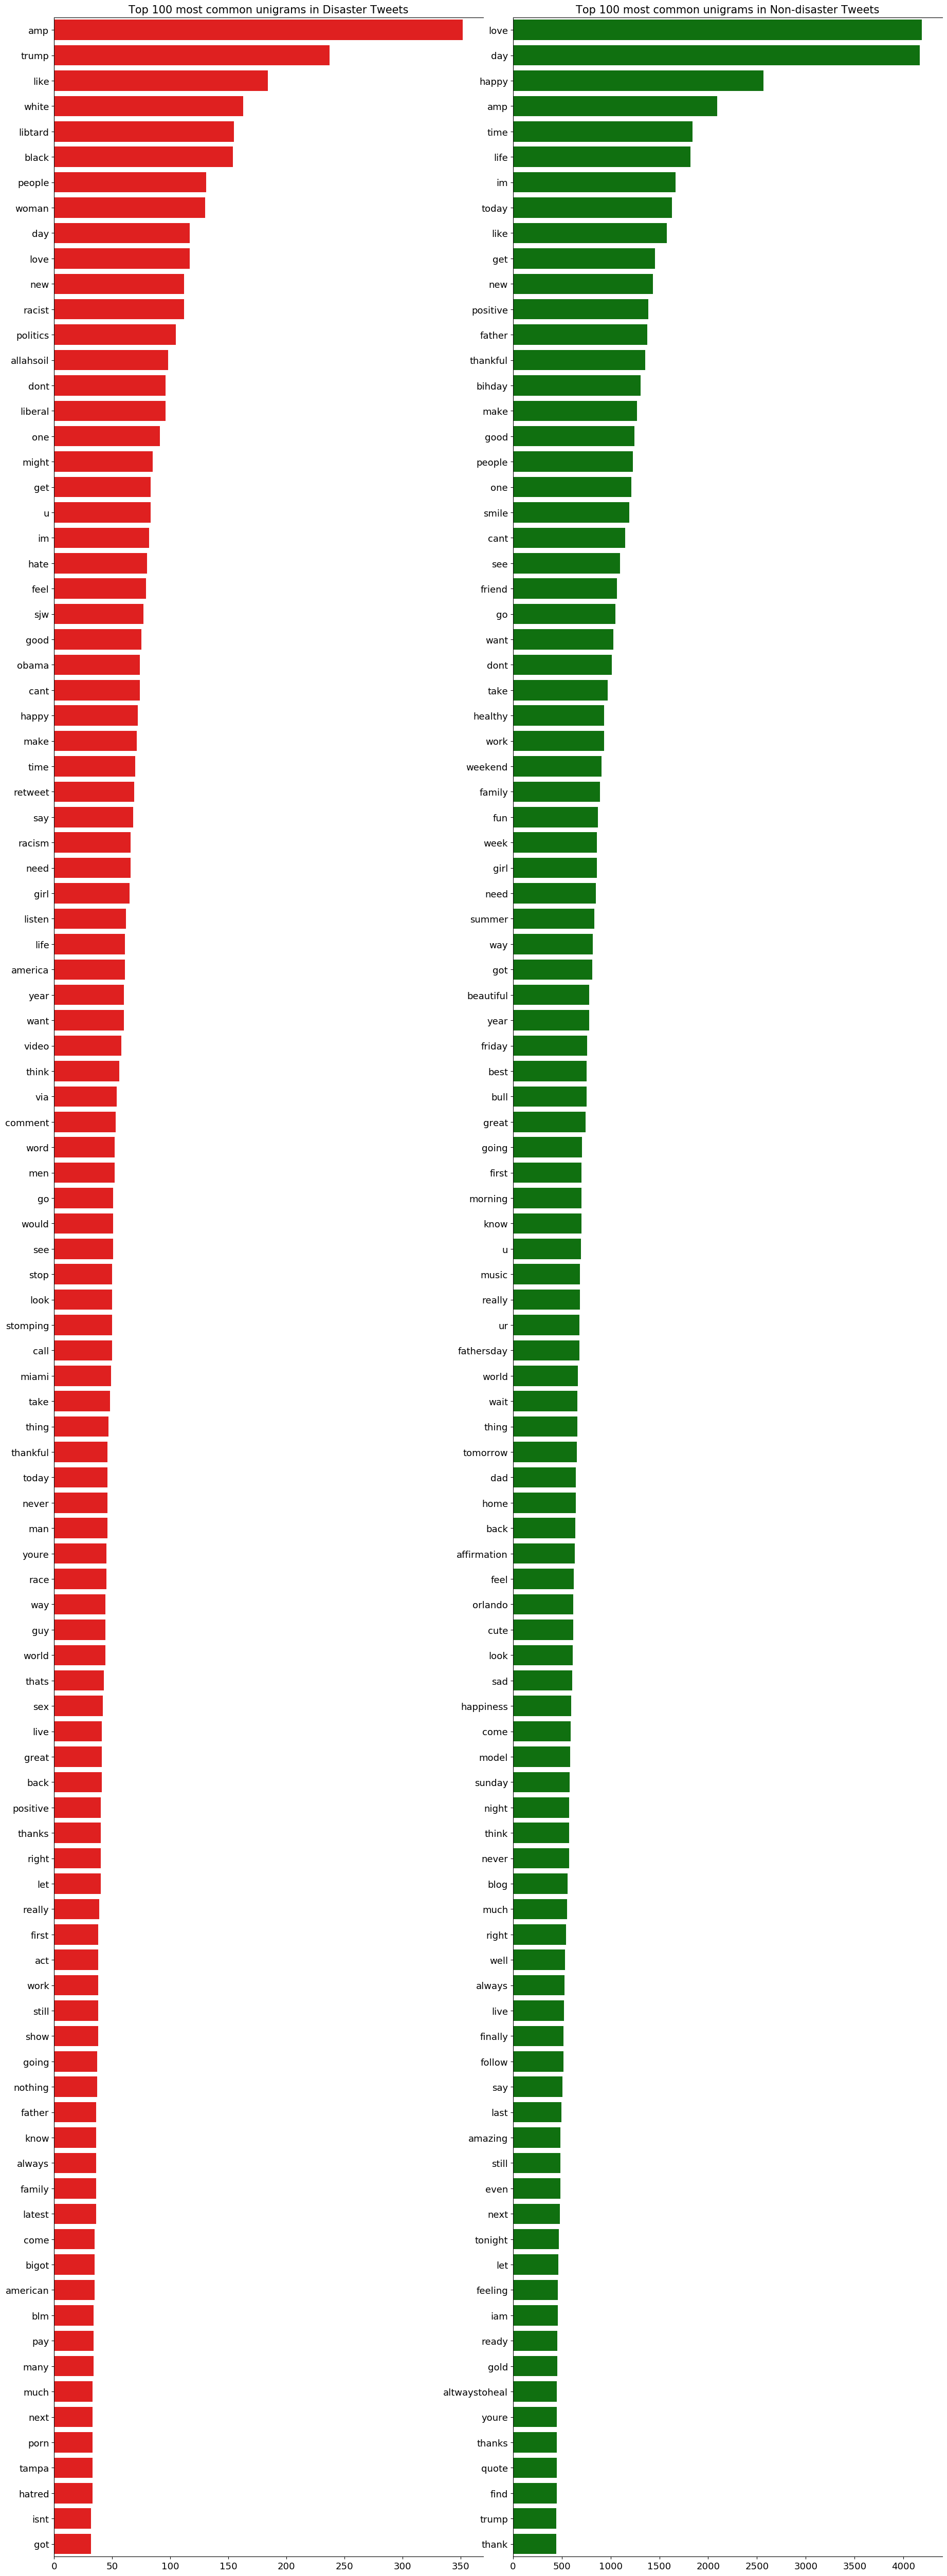

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

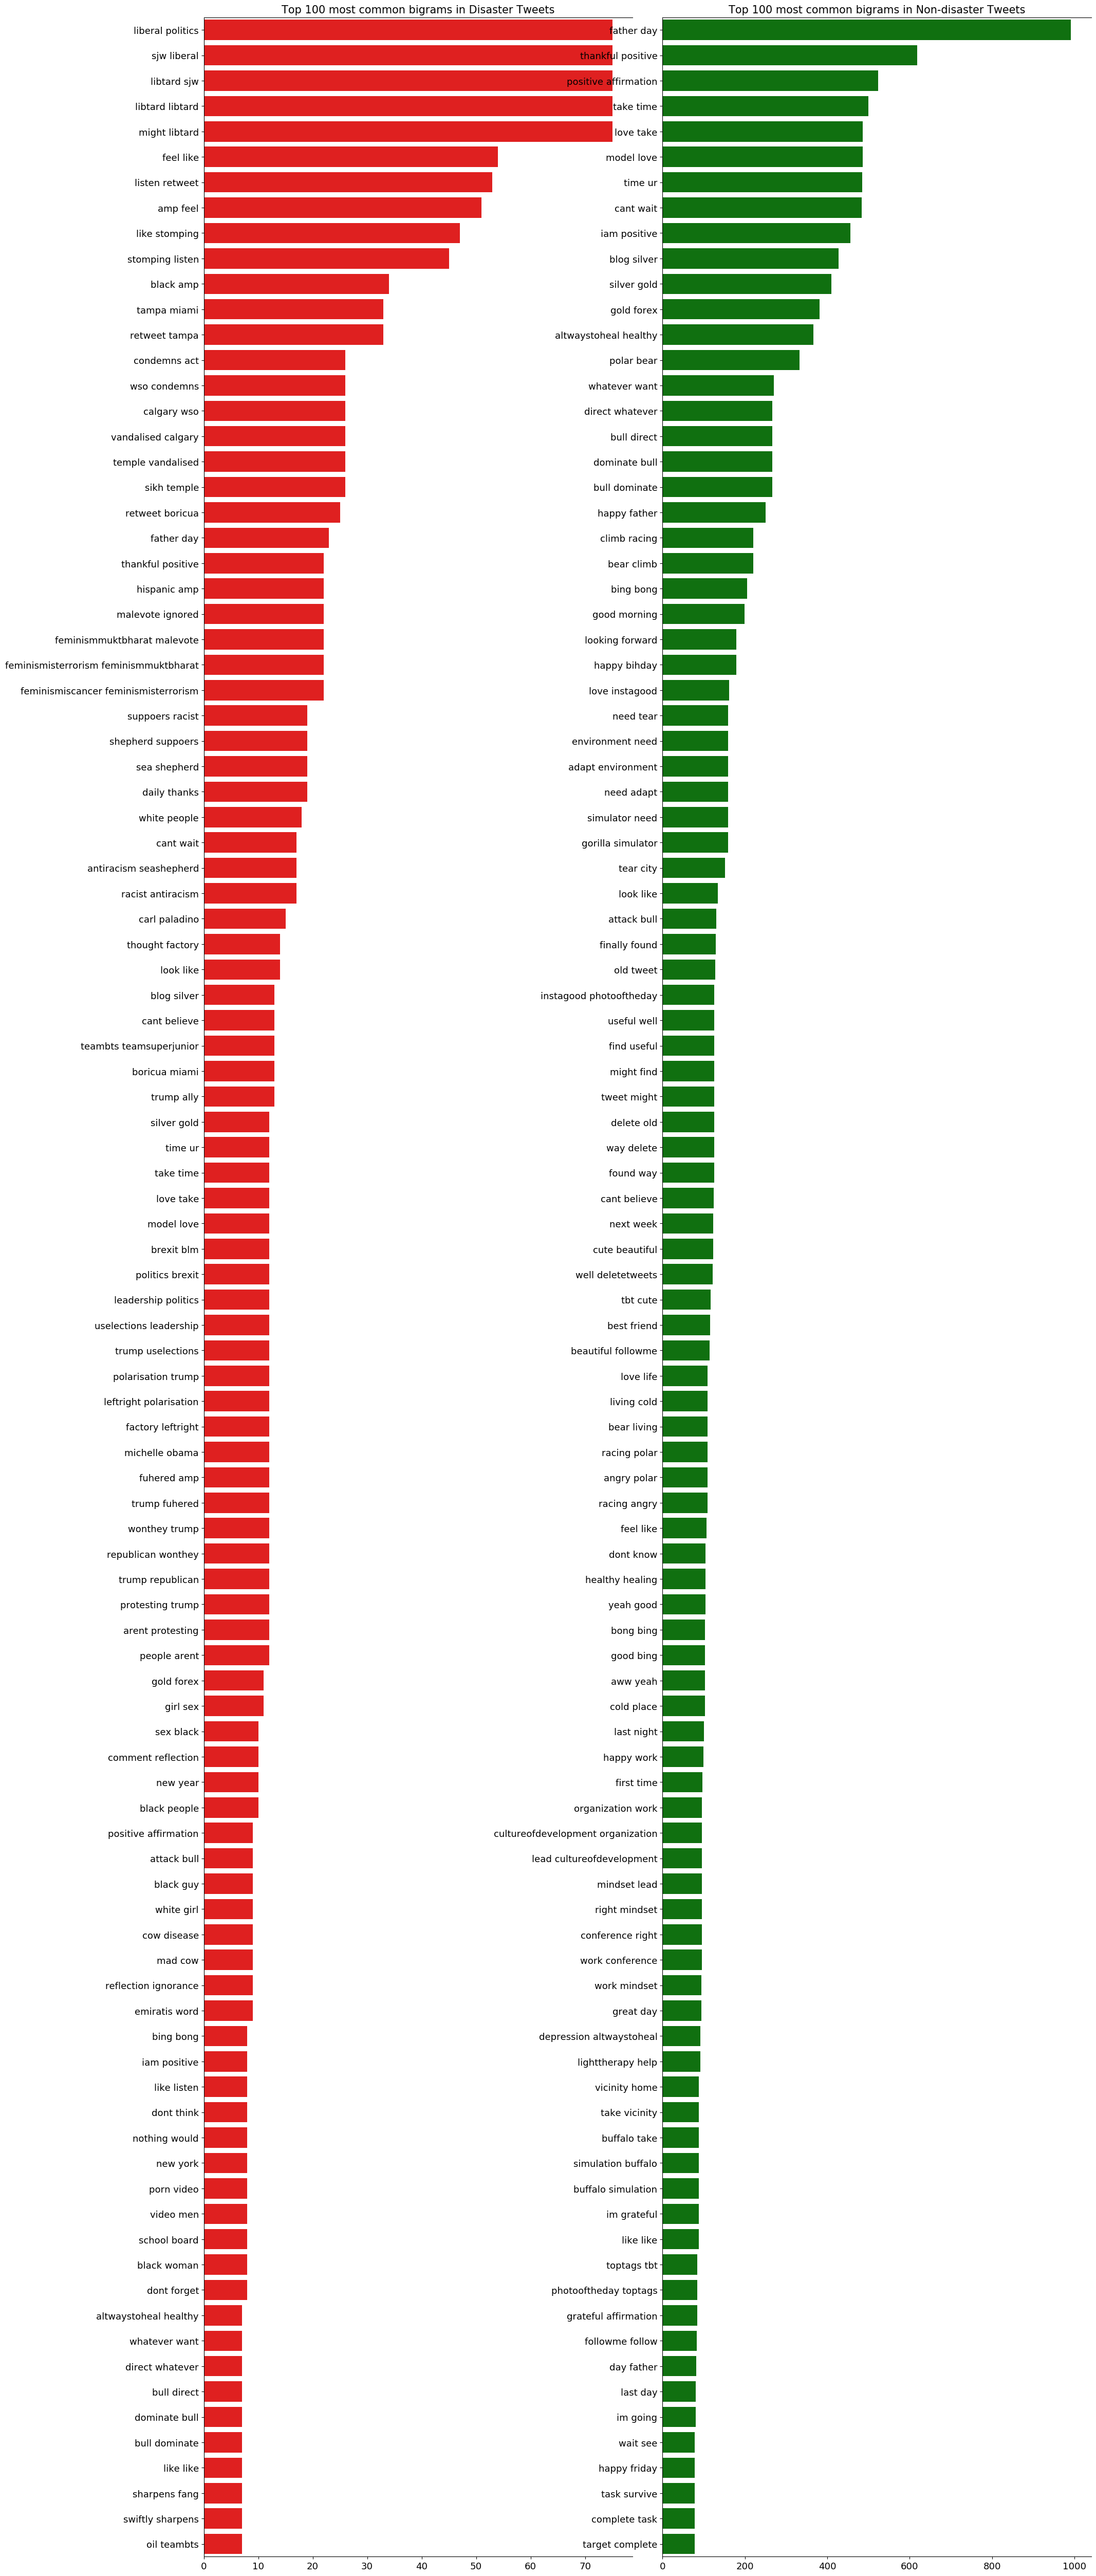

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()





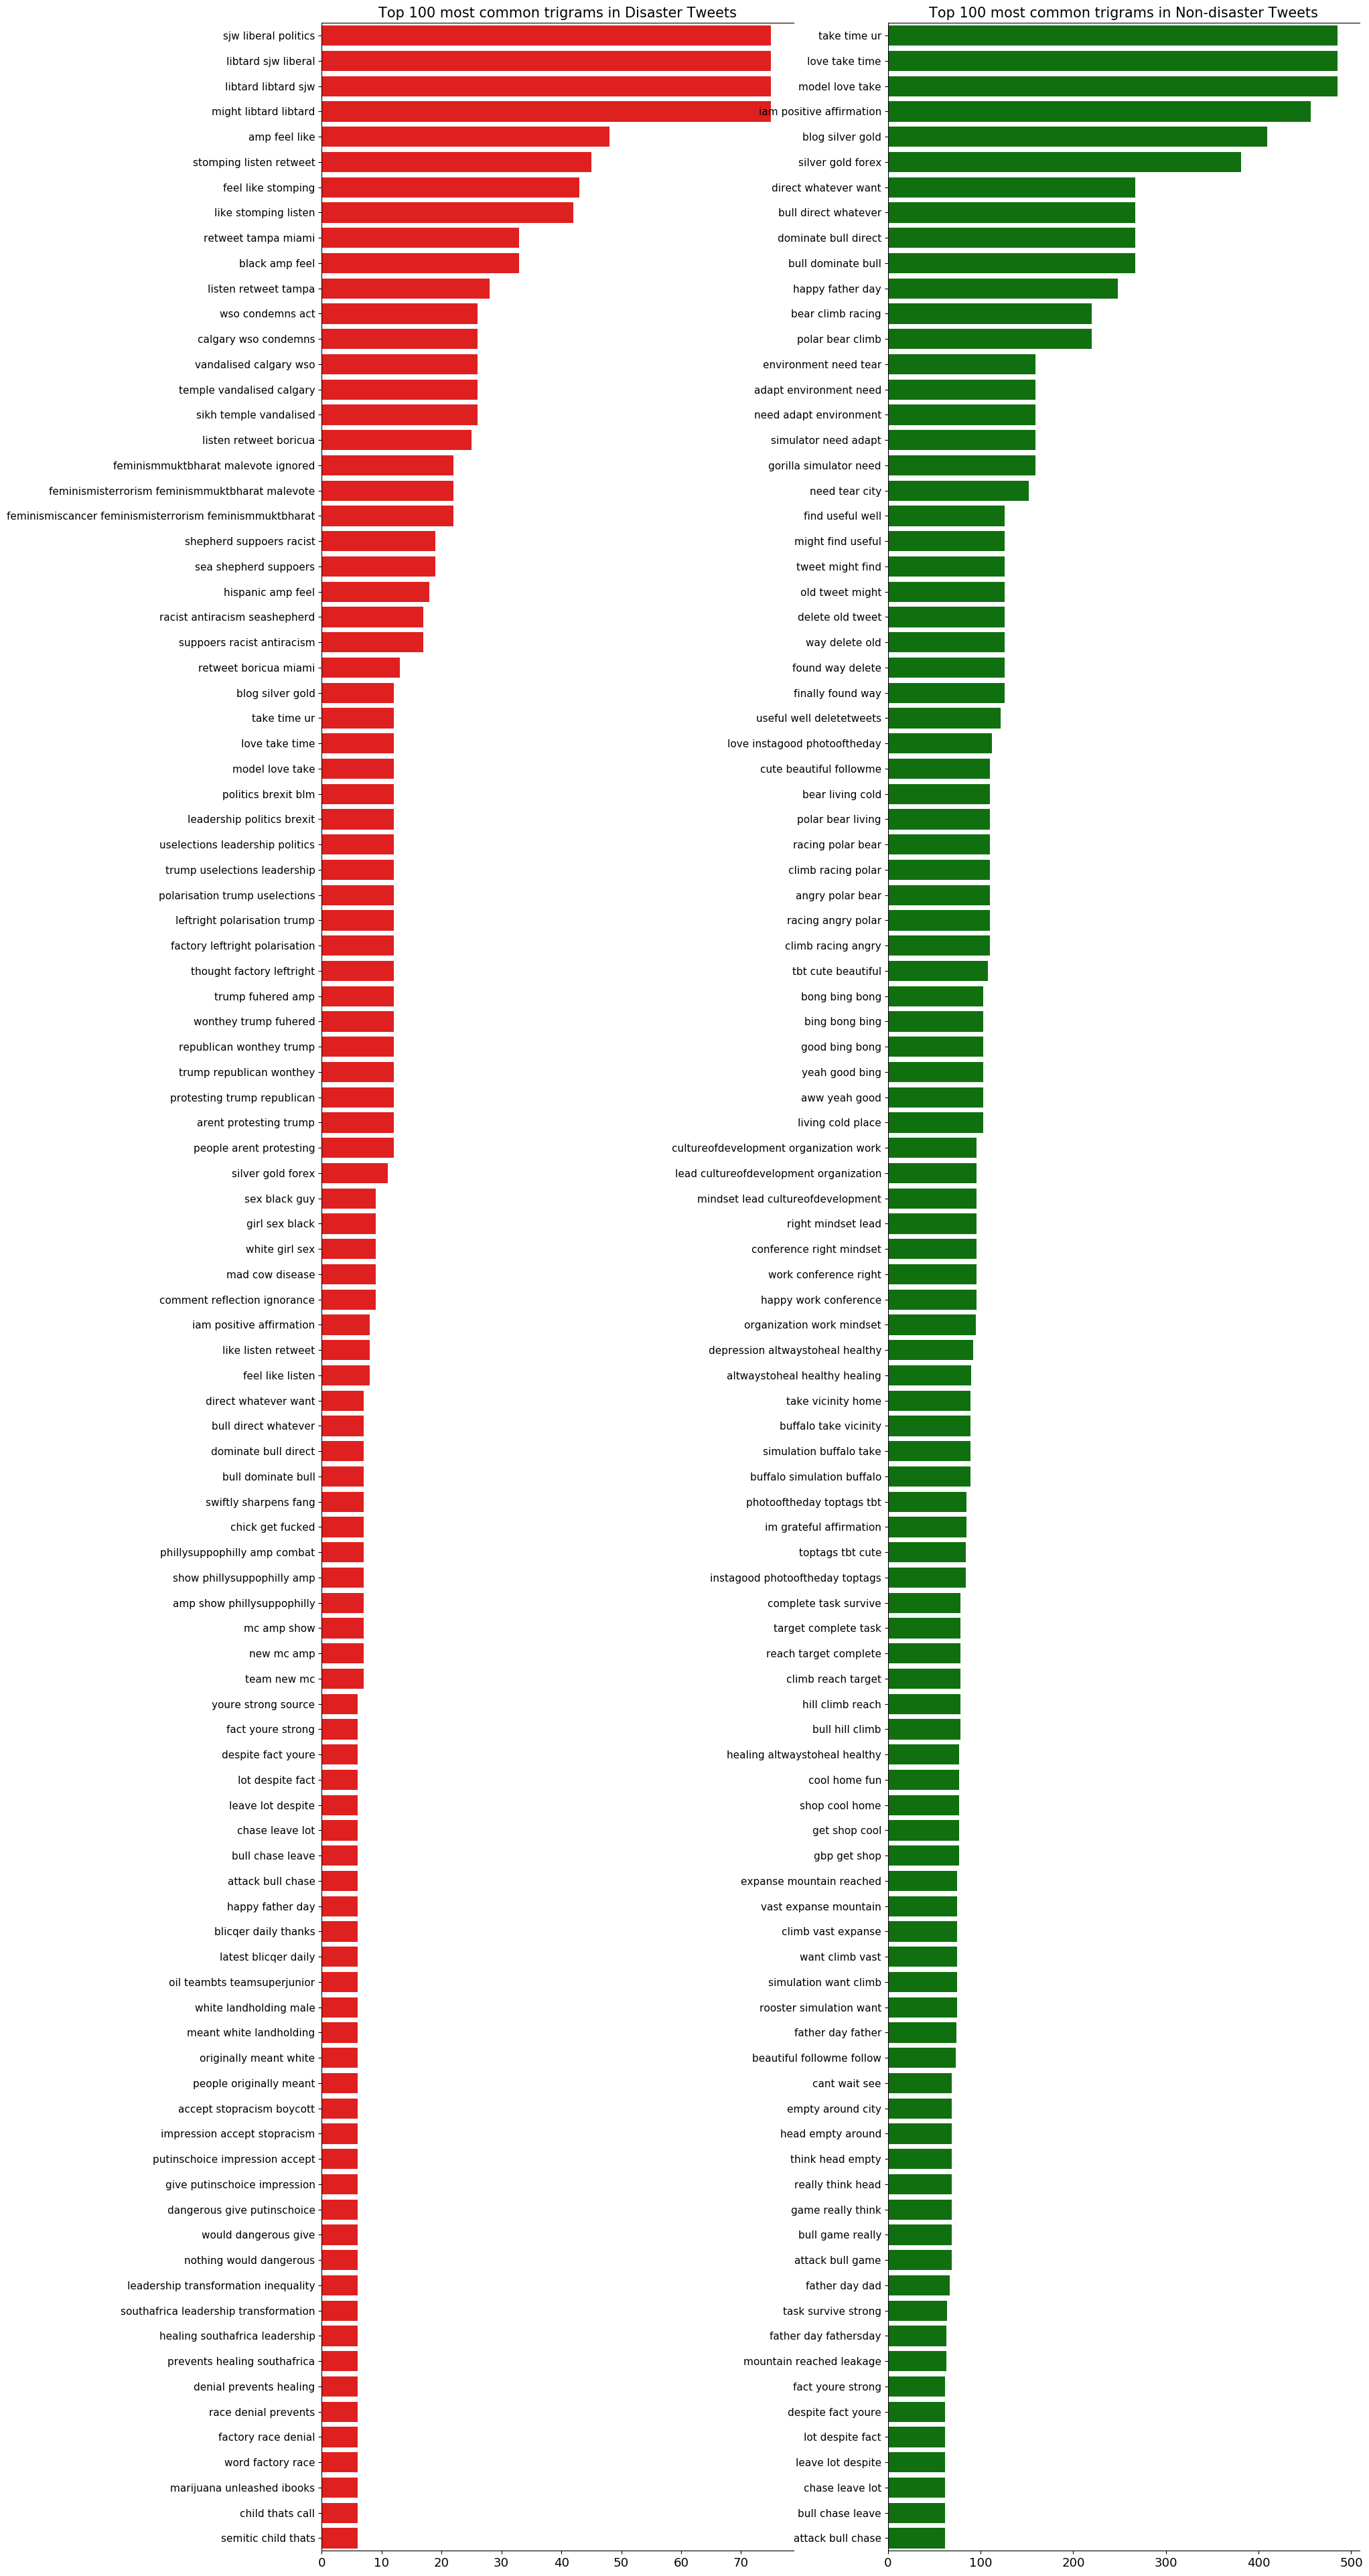

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 50), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} most common trigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [107]:
#lis = ["bihday","bihdaygirl","bihdaysway","bihdays", "bihdaygs","bihdaytome","bihdayboy","bihdaycake", "thbihday" ,  "itsmybihday",  "bihdayjodistamaria"  , "bihdaykazuki" , "bihdaypresent" ]

lis = ["feminismmuktbharat", "feminismiscancer", "feminismisterrorism"]

In [108]:
deneme = df.copy()

In [109]:
deneme["new"] = deneme['tweet'].apply(lambda x: " ".join(x for x in x.split() if x in lis))

In [117]:
deneme.head(10)

,label,tweet,new
0,0.0,father dysfunctional selfish drag kid dysfunction run,
1,0.0,thanks lyft credit cant use cause dont offer wheelchair van pdx getthanked,
2,0.0,bihday majesty,
3,0.0,model love take time ur,
4,0.0,factsguide society motivation,
5,0.0,huge fan fare big talking leave chaos pay get,
6,0.0,camping tomorrow danny,
7,0.0,next school year year exam cant think school exam hate imagine actorslife girl,
8,0.0,love land allin cavs champion cleveland,
9,0.0,welcome im gr,


In [111]:
deneme2 = deneme.drop(["tweet"], axis=1)

In [112]:
deneme2.head(10)

,label,new
0,0.0,
1,0.0,
2,0.0,
3,0.0,
4,0.0,
5,0.0,
6,0.0,
7,0.0,
8,0.0,
9,0.0,


In [113]:
deneme3 = deneme2[deneme2.apply(lambda row: row['new'] in lis, axis=1)]

In [67]:
deneme2["new2"] = deneme2['new'].apply(lambda x: "a".join(x for x in x.split() if x in lis))

D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
deneme3.head(1000)

,label,new


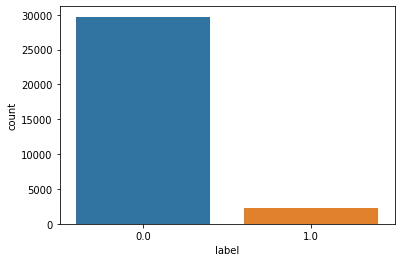

In [105]:
sns.countplot(deneme["label"])

In [20]:
train=df[:train.shape[0]]
test=df[train.shape[0]:]

In [101]:
x_train, x_val, y_train, y_val = train_test_split(train, target, test_size=0.3, random_state=2019)

In [102]:
vec = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 4), use_idf=1,smooth_idf=1,sublinear_tf=1, stop_words = 'english')

X_train_counts = vec.fit_transform(train['tweet'])

# TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(31962, 18467)

In [103]:
X_val_counts = vec.transform(x_val['tweet'])
X_val_tfidf = tfidf_transformer.transform(X_val_counts)
print(X_val_tfidf.shape)

(9589, 18467)


In [104]:
X_test_counts = vec.transform(test['tweet'])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)

(17197, 18467)


In [107]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=2019, C=10000).fit(X_train_tfidf, target)
y_pred = clf_log.predict(X_test_tfidf)
y_pred

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
for c in [10, 50, 100, 1000, 10000]:
    lr = LogisticRegression(C=c, random_state=2019).fit(X_train_tfidf, target)
    #lr = LogisticRegression(C=c, random_state=2019).fit(X_train_tfidf, y_train)
    print ("f1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(X_val_tfidf))))
    

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

f1 score for C=10: 0.9121212121212121


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


f1 score for C=50: 0.9865343727852587


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


f1 score for C=100: 0.9908256880733946


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


f1 score for C=1000: 0.9943741209563995
f1 score for C=10000: 0.9964862965565706


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [109]:
print(f1_score(y_val, clf_log.predict(X_val_tfidf), average='macro'))

0.9981023428713577


In [110]:
sonuc = pd.DataFrame(data = y_pred, index = range(17197), columns=["label"] )

In [111]:
submission=pd.read_csv('sample.csv')
id = submission[["id"]]

In [112]:
s2= pd.concat([id,sonuc],axis=1)
s2.to_csv('230620_5.csv',index=False)